In [ ]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/IST 652 Final Project/FAOSTAT_data_8-15-2021.csv")


In [ ]:
df

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20152017,2015-2017,%,106,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20162018,2016-2018,%,106,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20172019,2017-2019,%,107,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20182020,2018-2020,%,106,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,2,Afghanistan,6122,Value,21011,Average value of food production (constant 200...,20152017,2015-2017,I$ per person,66,F,FAO estimate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22040,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,21059,Incidence of caloric losses at retail distribu...,2018,2018,%,2.13,F,FAO estimate,NaN
22041,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,21059,Incidence of caloric losses at retail distribu...,2019,2019,%,2.13,F,FAO estimate,NaN
22042,FS,Suite of Food Security Indicators,181,Zimbabwe,6121,Value,21059,Incidence of caloric losses at retail distribu...,2020,2020,%,2.13,F,FAO estimate,NaN
22043,FS,Suite of Food Security Indicators,181,Zimbabwe,6123,Value,21061,Average fat supply (g/cap/day) (3-year average),20152017,2015-2017,g/capita/day,51.7,F,FAO estimate,NaN


In [ ]:
#Selects only the columns we want
df2=df[['Area','Item','Value','Year']]


In [ ]:
df2

,Area,Item,Value,Year
0,Afghanistan,Average dietary energy supply adequacy (percen...,106,2015-2017
1,Afghanistan,Average dietary energy supply adequacy (percen...,106,2016-2018
2,Afghanistan,Average dietary energy supply adequacy (percen...,107,2017-2019
3,Afghanistan,Average dietary energy supply adequacy (percen...,106,2018-2020
4,Afghanistan,Average value of food production (constant 200...,66,2015-2017
...,...,...,...,...
22040,Zimbabwe,Incidence of caloric losses at retail distribu...,2.13,2018
22041,Zimbabwe,Incidence of caloric losses at retail distribu...,2.13,2019
22042,Zimbabwe,Incidence of caloric losses at retail distribu...,2.13,2020
22043,Zimbabwe,Average fat supply (g/cap/day) (3-year average),51.7,2015-2017


In [ ]:
#Pivots the data
df_wide=df2.pivot(index=['Area','Year'], columns='Item', values='Value')

In [ ]:
#resets the index, so that Area and Year are columns and not indexes
df_wide=df_wide.reset_index()


In [ ]:
df_wide.dtypes

Item
Area                                                                                                              object
Year                                                                                                              object
Average dietary energy requirement (kcal/cap/day)                                                                 object
Average dietary energy supply adequacy (percent) (3-year average)                                                 object
Average fat supply (g/cap/day) (3-year average)                                                                   object
Average protein supply (g/cap/day) (3-year average)                                                               object
Average supply of protein of animal origin (g/cap/day) (3-year average)                                           object
Average value of food production (constant 2004-2006 I$/cap) (3-year average)                                     object
Cereal import dependency ra

In [ ]:
#only get the data with three year averages
filter_list = ['2015-2017', '2016-2018', '2017-2019','2018-2020']
threeyearaverage=df_wide[df_wide.Year.isin(filter_list)]

In [ ]:
#converts selected columns to numeric
threeyearaverage[['Average dietary energy requirement (kcal/cap/day)',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Coefficient of variation of habitual caloric consumption distribution (real number)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of moderately or severely food insecure people (million) (3-year average)',
       'Number of people undernourished (million) (3-year average)',
       'Number of severely food insecure people (million) (3-year average)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using safely managed sanitation services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of exclusive breastfeeding among infants 0-5 months of age',
       'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of obesity in the adult population (18 years and older)',
       'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of undernourishment (percent) (3-year average)',
       'Rail lines density (total route in km per 100 square km of land area)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)']]=threeyearaverage[['Average dietary energy requirement (kcal/cap/day)',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Coefficient of variation of habitual caloric consumption distribution (real number)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of moderately or severely food insecure people (million) (3-year average)',
       'Number of people undernourished (million) (3-year average)',
       'Number of severely food insecure people (million) (3-year average)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using safely managed sanitation services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of exclusive breastfeeding among infants 0-5 months of age',
       'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of obesity in the adult population (18 years and older)',
       'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of undernourishment (percent) (3-year average)',
       'Rail lines density (total route in km per 100 square km of land area)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)']].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#divides the values out of 100, so that we get a decimal
threeyearaverage['Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)']=threeyearaverage['Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)']/100

<ipython-input-13-d7889a7b8f39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threeyearaverage['Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)']=threeyearaverage['Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)']/100


In [ ]:
#group by country and gets the mean Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)
Mal=threeyearaverage.groupby("Area")['Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)'].mean()
Mal=Mal.reset_index()

In [ ]:
#top 10 countries with severe food insecurity
topMal=Mal.sort_values('Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',ascending=False).head(10)
bottomMal=Mal.sort_values('Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)').head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

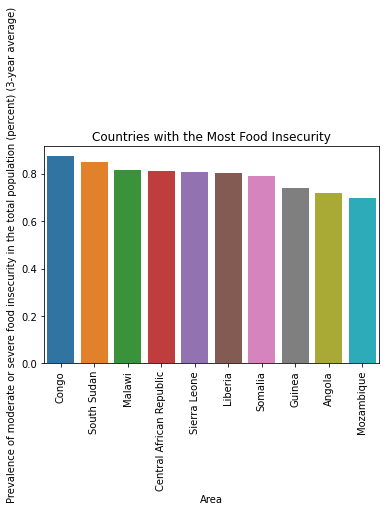

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=topMal, x="Area", y="Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)").set(title='Countries with the Most Food Insecurity')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

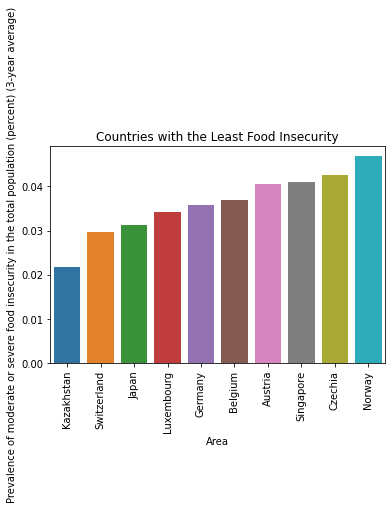

In [ ]:
sns.barplot(data=bottomMal, x="Area", y="Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)").set(title='Countries with the Least Food Insecurity')
plt.xticks(rotation = 90)

In [2]:
import json

with open('/content/drive/MyDrive/IST 652 Final Project/econ.json','r') as f:
  data = json.load(f)

In [4]:
#converts json to pandas dataframe
import pandas as pd
df2=pd.DataFrame(data)

In [5]:
#converts categories to numeric
df2[['GDP per capita current U.S. dollars', 'Capital investment billion USD',
       'Household consumption billion USD',
       'Inflation: percent change in the Consumer Price Index',
       'Labor force million people', 'Unemployment rate',
       'Foreign Direct Investment percent of GDP',
       'Foreign Direct Investment billion USD',
       'Trade balance as percent of GDP', 'Trade balance billion USD',
       'External debt percent of Gross National Income']]=df2[['GDP per capita current U.S. dollars', 'Capital investment billion USD',
       'Household consumption billion USD',
       'Inflation: percent change in the Consumer Price Index',
       'Labor force million people', 'Unemployment rate',
       'Foreign Direct Investment percent of GDP',
       'Foreign Direct Investment billion USD',
       'Trade balance as percent of GDP', 'Trade balance billion USD',
       'External debt percent of Gross National Income']].apply(pd.to_numeric, errors='coerce')

In [6]:
#gets three year averages, so that we can join this dataframe with previous dataframe
avg20152017=df2[df2.Year.between(2015, 2017)]
avg20152017=avg20152017.groupby(["Country"]).mean()
avg20152017["Year"]="2015-2017"
avg20162018=df2[df2.Year.between(2016, 2018)]
avg20162018=avg20162018.groupby(["Country"]).mean()
avg20162018["Year"]="2016-2018"
avg20172019=df2[df2.Year.between(2017, 2019)]
avg20172019=avg20162018.groupby(["Country"]).mean()
avg20172019["Year"]="2017-2019"
avg20182020=df2[df2.Year.between(2018, 2020)]
avg20182020=avg20162018.groupby(["Country"]).mean()
avg20182020["Year"]="2018-2020"

<ipython-input-6-abb78a950333>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg20152017=avg20152017.groupby(["Country"]).mean()
<ipython-input-6-abb78a950333>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg20162018=avg20162018.groupby(["Country"]).mean()
<ipython-input-6-abb78a950333>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg20172019=avg20162018.groupby(["Country"]).mean()
<ipython-input-6-abb78a95

In [9]:
#binds the tables together
averages = pd.concat([avg20152017, avg20162018,avg20172019,avg20182020])

In [10]:
#rename Area, so that we can merge the two datasets
averages.rename(columns={"Area":"Country"},inplace = True)

In [17]:
averages.to_csv("econ_averages.csv")

In [ ]:
#merges financial insecurity data with economic data 
df_merged=pd.merge(threeyearaverage, averages, on=['Country','Year'], how='inner')

In [ ]:
df_merged.to_csv("merged.csv")

In [19]:
from google.colab import files
files.download("econ_averages.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#remove columns that produce NANs in correlation matrix
df_merged=df_merged.drop(columns = ['Average dietary energy requirement (kcal/cap/day)','Coefficient of variation of habitual caloric consumption distribution (real number)', 'Coefficient of variation of habitual caloric consumption distribution (real number)','Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Minimum dietary energy requirement  (kcal/cap/day)', 'Number of severely food insecure people (million) (3-year average)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using safely managed sanitation services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of exclusive breastfeeding among infants 0-5 months of age', 'Prevalence of obesity in the adult population (18 years and older)', 'Rail lines density (total route in km per 100 square km of land area)'])
       

In [ ]:
df_merged.corr()

,Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),Number of moderately or severely food insecure people (million) (3-year average),Number of people undernourished (million) (3-year average),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),...,Capital investment billion USD,Household consumption billion USD,Inflation: percent change in the Consumer Price Index,Labor force million people,Unemployment rate,Foreign Direct Investment percent of GDP,Foreign Direct Investment billion USD,Trade balance as percent of GDP,Trade balance billion USD,External debt percent of Gross National Income
Average dietary energy supply adequacy (percent) (3-year average),1.000000,0.679844,0.798756,0.604843,0.374263,-0.159883,0.953295,-0.244123,-0.139109,-0.638321,...,0.137683,0.202224,-0.144015,0.055387,-0.035910,-0.019590,0.258765,0.301346,0.185405,0.077650
Average fat supply (g/cap/day) (3-year average),0.679844,1.000000,0.795160,0.877866,0.432553,-0.206361,0.814061,-0.458147,-0.143199,-0.766079,...,0.109083,0.216397,-0.337941,-0.034216,0.078766,0.045089,0.290850,0.373237,0.276570,0.344107
Average protein supply (g/cap/day) (3-year average),0.798756,0.795160,1.000000,0.891265,0.383722,-0.177028,0.895975,-0.399880,-0.150401,-0.742513,...,0.141964,0.205516,-0.325104,0.012777,0.117176,0.055898,0.261358,0.397813,0.231343,0.217270
Average supply of protein of animal origin (g/cap/day) (3-year average),0.604843,0.877866,0.891265,1.000000,0.415116,-0.185620,0.770361,-0.469036,-0.181633,-0.769768,...,0.085525,0.170776,-0.375239,-0.054238,0.085992,0.083497,0.257451,0.428616,0.253586,0.376713
Average value of food production (constant 2004-2006 I$/cap) (3-year average),0.374263,0.432553,0.383722,0.415116,1.000000,-0.366590,0.424193,-0.172191,-0.091327,-0.316440,...,0.059509,0.124867,-0.094180,0.011876,-0.012941,0.055047,0.239863,0.182221,0.104839,0.093123
Cereal import dependency ratio (percent) (3-year average),-0.159883,-0.206361,-0.177028,-0.185620,-0.366590,1.000000,-0.185228,0.072787,-0.100332,0.206577,...,-0.052242,-0.102393,-0.079823,-0.057312,0.147453,0.132090,-0.060249,-0.187371,-0.001341,0.027837
Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),0.953295,0.814061,0.895975,0.770361,0.424193,-0.185228,1.000000,-0.353860,-0.149228,-0.786607,...,0.150081,0.226840,-0.234349,0.044558,0.028409,0.022049,0.291371,0.398293,0.248302,0.153983
Number of moderately or severely food insecure people (million) (3-year average),-0.244123,-0.458147,-0.399880,-0.469036,-0.172191,0.072787,-0.353860,1.000000,0.876951,0.417947,...,0.014734,0.081005,0.425979,0.621581,-0.151948,-0.120427,-0.018460,-0.110871,-0.180563,-0.367776
Number of people undernourished (million) (3-year average),-0.139109,-0.143199,-0.150401,-0.181633,-0.091327,-0.100332,-0.149228,0.876951,1.000000,0.195895,...,0.846554,0.809835,0.029382,0.962769,-0.085410,-0.103548,0.643224,0.037271,-0.581623,-0.177172
Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),-0.638321,-0.766079,-0.742513,-0.769768,-0.316440,0.206577,-0.786607,0.417947,0.195895,1.000000,...,-0.318129,-0.295600,0.539630,-0.010012,0.000203,-0.042525,-0.290323,-0.492835,-0.294138,-0.243460


In [ ]:
corr=abs(df_merged.corr().sort_values(ascending=False).drop_duplicates().head(10))
print(corr)

NameError: ignored

In [ ]:
df_merged.corr()['Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)']

Average dietary energy supply adequacy (percent) (3-year average)                                                -0.638321
Average fat supply (g/cap/day) (3-year average)                                                                  -0.766079
Average protein supply (g/cap/day) (3-year average)                                                              -0.742513
Average supply of protein of animal origin (g/cap/day) (3-year average)                                          -0.769768
Average value of food production (constant 2004-2006 I$/cap) (3-year average)                                    -0.316440
Cereal import dependency ratio (percent) (3-year average)                                                         0.206577
Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)   -0.786607
Number of moderately or severely food insecure people (million) (3-year average)                                  0.417947
Number of people

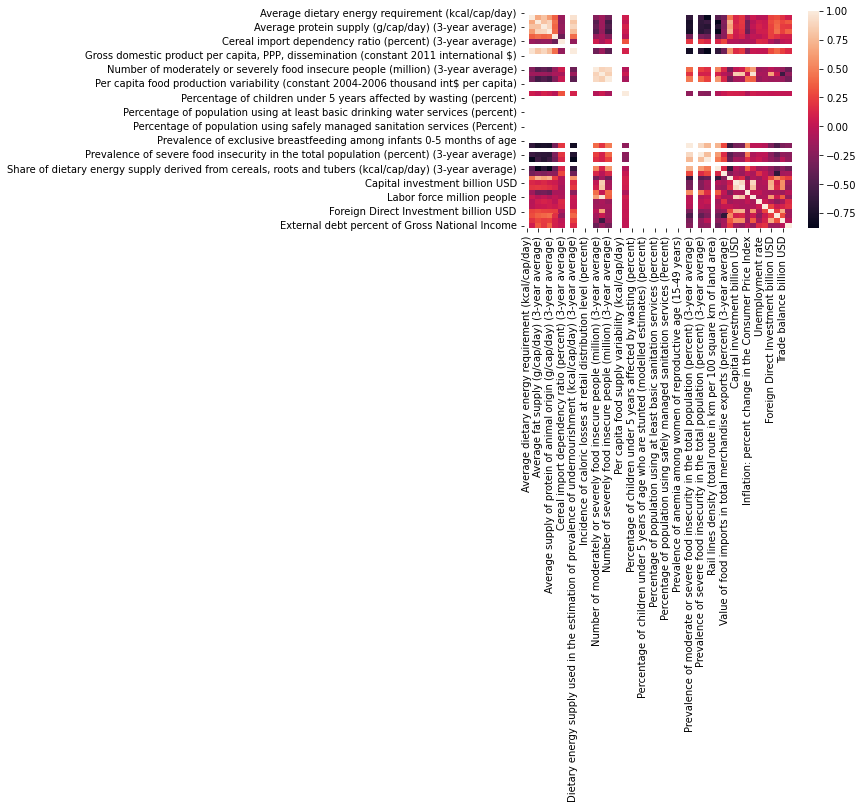

In [ ]:
import seaborn as sns
sns.heatmap(df_merged.corr())

In [ ]:
d

In [ ]:

#list of only numeric columns 
numeric_columns=[column for column in df_merged.columns if df_merged[column] .dtype=='float64']

In [ ]:
#interactive scatter plot, where we can change the columns 
import ipywidgets as widgets
dd1=widgets.Dropdown(options=numeric_columns,description='Column1')
dd2=widgets.Dropdown(options=numeric_columns,description='Column2')

ui=widgets.HBox([dd1,dd2])

def draw_countplot(column1,column2):
  p=sns.relplot(data=df_merged,x=column1,y=column2)
out=widgets.interactive_output(draw_countplot,{'column1':dd1,'column2':dd2})
display(ui,out)

Output()

Demographic Food Insecurity Data

In [ ]:

df3=pd.read_csv("/content/drive/MyDrive/IST 652 Final Project/food_security_csv_datafiles/Food security, all households_2021.csv")

In [ ]:
#since our previous data is from 2015-2020, we are going to use the same years
year_list = [2015, 2016, 2017,2018,2019,2020]
df3=df3[df3.Year.isin(year_list)]

In [ ]:
#some of the column names contained spaces, so I removed them
df3.columns = df3.columns.str.replace(' ', '')

In [ ]:
#removes the comma in some of the numeric data and converted type from object to float
df3[['Total','Foodsecure-1,000','Lowfoodsecurity-1,000','Verylowfoodsecurity-1,000']]=df3[['Total','Foodsecure-1,000','Lowfoodsecurity-1,000','Verylowfoodsecurity-1,000']].replace(',','', regex=True).apply(pd.to_numeric, errors='coerce')

In [ ]:
df3.Category.unique()

array(['All households', 'Household composition',
       'Race/ethnicity of households',
       'Household income-to-poverty ratio', 'Area of residence',
       'Census geographic region'], dtype=object)

In [ ]:
#Gets data only with category race and get the means of each subcategory. I do this for every category
race_df=df3[df3['Category']=='Race/ethnicity of households']
race_df.groupby(["Subcategory"]).mean().sort_values(['Foodinsecure-percent'],ascending=False)

,Year,Total,"Foodsecure-1,000",Foodsecure-percent,Foodinsecure-percent,"Lowfoodsecurity-1,000",Lowfoodsecurity-percent,"Verylowfoodsecurity-1,000",Verylowfoodsecurity-percent
Subcategory,,,,,,,,,
Black non-Hispanic,2017.5,16305.833333,12833.833333,78.700000,21.300000,2091.000000,12.800000,1381.000000,8.466667
Hispanic,2017.5,17622.166667,14557.666667,82.566667,17.433333,2106.500000,11.966667,958.000000,5.450000
Other,2017.5,9398.166667,8470.000000,90.100000,9.900000,558.333333,5.933333,369.833333,3.950000
White non-Hispanic,2017.5,84700.500000,77474.666667,91.466667,8.533333,4226.833333,5.016667,2999.000000,3.533333


In [ ]:
pov_ratio=df3[df3['Category']=='Household income-to-poverty ratio']
pov_ratio.groupby(["Subcategory"]).mean().sort_values(['Foodinsecure-percent'],ascending=False)

,Year,Total,"Foodsecure-1,000",Foodsecure-percent,Foodinsecure-percent,"Lowfoodsecurity-1,000",Lowfoodsecurity-percent,"Verylowfoodsecurity-1,000",Verylowfoodsecurity-percent
Subcategory,,,,,,,,,
Under 1.00,2017.5,12455.333333,7896.000000,63.516667,36.483333,2548.833333,20.416667,2010.500000,16.050000
Under 1.30,2017.5,17348.833333,11374.000000,65.633333,34.366667,3428.833333,19.750000,2546.000000,14.616667
Under 1.85,2017.5,27353.333333,19104.000000,69.916667,30.083333,4890.333333,17.833333,3359.000000,12.250000
Income unknown,2017.5,31588.833333,28887.833333,91.433333,8.566667,1618.500000,5.133333,1082.500000,3.433333
1.85 and over,2017.5,69084.666667,65344.166667,94.566667,5.433333,2474.166667,3.583333,1266.333333,1.833333


In [ ]:
comp=df3[df3['Category']=='Household composition']
comp.groupby(["Subcategory",'Sub-subcategory']).mean().sort_values(['Foodinsecure-percent'],ascending=False)

Year         Total  \
Subcategory                 Sub-subcategory                                    
With children < 18 years    Female head, no spouse      2017.5   9655.000000   
                            Other household with child  2017.5    501.333333   
                            Male head, no spouse        2017.5   3184.166667   
                            With children < 6 years     2017.5  16384.333333   
With no children < 18 years Women living alone          2017.5  20093.000000   
                            Men living alone            2017.5  16497.166667   
With children < 18 years    Married-couple families     2017.5  24734.500000   
With elderly                Elderly living alone        2017.5  14476.833333   
With no children < 18 years More than one adult         2017.5  53362.166667   

                                                        Foodsecure-1,000  \
Subcategory                 Sub-subcategory                                
With children < 18 years    Female head, no spouse           6815.500000   
                            Other household with child        402.833333   
                            Male head, no spouse             2595.333333   
                            With children < 6 years         13817.500000   
With no children < 18 years Women living alone              17394.333333   
                            Men living alone                14346.166667   
With children < 18 years    Married-couple families         22467.500000   
With elderly                Elderly living alone            13210.666667   
With no children < 18 years More than one adult             49315.666667   

                                                        Foodsecure-percent  \
Subcategory                 Sub-subcategory                                  
With children < 18 years    Female head, no spouse               70.600000   
                            Other household with child           80.433333   
                            Male head, no spouse                 81.433333   
                            With children < 6 years              84.333333   
With no children < 18 years Women living alone                   86.550000   
                            Men living alone                     86.933333   
With children < 18 years    Married-couple families              90.850000   
With elderly                Elderly living alone                 91.233333   
With no children < 18 years More than one adult                  92.416667   

                                                        Foodinsecure-percent  \
Subcategory                 Sub-subcategory                                    
With children < 18 years    Female head, no spouse                 29.400000   
                            Other household with child             19.566667   
                            Male head, no spouse                   18.566667   
                            With children < 6 years                15.666667   
With no children < 18 years Women living alone                     13.450000   
                            Men living alone                       13.066667   
With children < 18 years    Married-couple families                 9.150000   
With elderly                Elderly living alone                    8.766667   
With no children < 18 years More than one adult                     7.583333   

                                                        Lowfoodsecurity-1,000  \
Subcategory                 Sub-subcategory                                     
With children < 18 years    Female head, no spouse                1936.333333   
                            Other household with child              82.000000   
                            Male head, no spouse                   399.500000   
                            With children < 6 years               1910.000000   
With no children < 18 years Women living alone                    1393.666667   
                            Men l

In [ ]:
res=df3[df3['Category']=='Area of residence']
res.groupby(["Subcategory"]).mean().sort_values(['Foodinsecure-percent'],ascending=False)

,Year,Total,"Foodsecure-1,000",Foodsecure-percent,Foodinsecure-percent,"Lowfoodsecurity-1,000",Lowfoodsecurity-percent,"Verylowfoodsecurity-1,000",Verylowfoodsecurity-percent
Subcategory,,,,,,,,,
Outside metropolitan area,2017.5,18221.333333,15784.500000,86.650000,13.350000,1461.666667,8.016667,975.166667,5.333333
Inside metropolitan area,2017.5,67552.666667,60091.222222,88.738889,11.261111,4580.833333,6.905556,2880.611111,4.361111


In [ ]:
geo=df3[df3['Category']=='Census geographic region']
geo.groupby(["Subcategory"]).mean().sort_values(['Foodinsecure-percent'],ascending=False)

,Year,Total,"Foodsecure-1,000",Foodsecure-percent,Foodinsecure-percent,"Lowfoodsecurity-1,000",Lowfoodsecurity-percent,"Verylowfoodsecurity-1,000",Verylowfoodsecurity-percent
Subcategory,,,,,,,,,
South,2017.5,49059.333333,42881.000000,87.383333,12.616667,3770.666667,7.700000,2407.666667,4.916667
Midwest,2017.5,27588.166667,24483.333333,88.750000,11.250000,1826.166667,6.633333,1278.666667,4.633333
West,2017.5,28955.166667,25856.166667,89.266667,10.733333,1939.500000,6.700000,1159.500000,4.016667
Northeast,2017.5,22424.333333,20115.833333,89.716667,10.283333,1446.166667,6.433333,862.333333,3.850000


In [ ]:
df3['Year'] = df3['Year'].astype(str)

In [ ]:
import plotly.express as px
fig= px.bar(df3, x="Subcategory", y='Foodinsecure-percent',barmode='group',text_auto=True)
fig.show()

In [ ]:
import plotly.express as px
fig2= px.bar(df3, x="Subcategory", y='Foodinsecure-1,000',barmode='group', color='Year',text_auto=True)
fig2.show()